In [ ]:
kimport numpy as np 
import pandas as pd 
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
duplicate = pd.read_csv('/content/weblog.csv',squeeze=True)
duplicate

<ipython-input-2-fef35cf7cc2c>:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  duplicate = pd.read_csv('/content/weblog.csv',squeeze=True)


,IP,Time,URL,Staus
0,10.128.2.1,[29/Nov/2017:06:58:55,GET /login.php HTTP/1.1,200
1,10.128.2.1,[29/Nov/2017:06:59:02,POST /process.php HTTP/1.1,302
2,10.128.2.1,[29/Nov/2017:06:59:03,GET /home.php HTTP/1.1,200
3,10.131.2.1,[29/Nov/2017:06:59:04,GET /js/vendor/moment.min.js HTTP/1.1,200
4,10.130.2.1,[29/Nov/2017:06:59:06,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1,200
...,...,...,...,...
16002,10.130.2.1,[02/Mar/2018:15:47:12,GET /showcode.php?id=309&nm=ham05 HTTP/1.1,200
16003,10.130.2.1,[02/Mar/2018:15:47:23,GET /allsubmission.php HTTP/1.1,200
16004,10.130.2.1,[02/Mar/2018:15:47:32,GET /showcode.php?id=309&nm=ham05 HTTP/1.1,200
16005,10.130.2.1,[02/Mar/2018:15:47:35,GET /allsubmission.php HTTP/1.1,200


In [ ]:
duplicate.dtypes

IP       object
Time     object
URL      object
Staus    object
dtype: object

In [ ]:
df=pd.read_csv('/content/weblog.csv',squeeze=True)
data=pd.DataFrame(df)

<ipython-input-4-c2edf8f17056>:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df=pd.read_csv('/content/weblog.csv',squeeze=True)


In [ ]:
print(data)

               IP                   Time  \
0      10.128.2.1  [29/Nov/2017:06:58:55   
1      10.128.2.1  [29/Nov/2017:06:59:02   
2      10.128.2.1  [29/Nov/2017:06:59:03   
3      10.131.2.1  [29/Nov/2017:06:59:04   
4      10.130.2.1  [29/Nov/2017:06:59:06   
...           ...                    ...   
16002  10.130.2.1  [02/Mar/2018:15:47:12   
16003  10.130.2.1  [02/Mar/2018:15:47:23   
16004  10.130.2.1  [02/Mar/2018:15:47:32   
16005  10.130.2.1  [02/Mar/2018:15:47:35   
16006  10.130.2.1  [02/Mar/2018:15:47:46   

                                                 URL Staus  
0                            GET /login.php HTTP/1.1   200  
1                         POST /process.php HTTP/1.1   302  
2                             GET /home.php HTTP/1.1   200  
3              GET /js/vendor/moment.min.js HTTP/1.1   200  
4      GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1   200  
...                                              ...   ...  
16002     GET /showcode.php?id=309&nm=ham05 

In [ ]:
data.dtypes

IP       object
Time     object
URL      object
Staus    object
dtype: object

In [ ]:
data['Time']=data['Time'].map(lambda x: x.lstrip('['))
data['Time'] = data['Time'].str.split(':',n = 1, expand = True)

data['Time'] = pd.to_datetime(data['Time'],format='%d%m%Y', errors='ignore')

In [ ]:
data = data.rename(columns={'Staus': 'Status'}, index={'ONE': 'one'})

In [ ]:
data['URL']=data['URL'].map(lambda x: x.lstrip('0'))
data.describe()

,IP,Time,URL,Status
count,16007,16007,16007,16007
unique,16,7307,314,13
top,10.128.2.1,cannot,GET /login.php HTTP/1.1,200
freq,4257,167,3284,11330


In [ ]:
data.isnull().sum().sum()

0

In [ ]:
'''empty = []
date_list = data['Time']
for i in date_list:
    empty = i
    data['date_time'].append(i)
#data['date_time'] = data['Time'].to_string()
data['date_time'][0]'''

"empty = []\ndate_list = data['Time']\nfor i in date_list:\n    empty = i\n    data['date_time'].append(i)\n#data['date_time'] = data['Time'].to_string()\ndata['date_time'][0]"

In [ ]:
data['Time'][0]

'29/Nov/2017:06:58:55'

In [ ]:
# converting the date_time into datetime format

data['month'] = data['Time'].str.slice(3, 6)
data['day'] = data['Time'].str.slice(0, 2) 

In [ ]:
#data['URL'] = str(data['URL'])

In [ ]:
#data['Requests'] = data['URL'].str.split('HTTP/1.1')
data

,IP,Time,URL,Status,month,day
0,10.128.2.1,29/Nov/2017:06:58:55,GET /login.php HTTP/1.1,200,Nov,29
1,10.128.2.1,29/Nov/2017:06:59:02,POST /process.php HTTP/1.1,302,Nov,29
2,10.128.2.1,29/Nov/2017:06:59:03,GET /home.php HTTP/1.1,200,Nov,29
3,10.131.2.1,29/Nov/2017:06:59:04,GET /js/vendor/moment.min.js HTTP/1.1,200,Nov,29
4,10.130.2.1,29/Nov/2017:06:59:06,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1,200,Nov,29
...,...,...,...,...,...,...
16002,10.130.2.1,02/Mar/2018:15:47:12,GET /showcode.php?id=309&nm=ham05 HTTP/1.1,200,Mar,02
16003,10.130.2.1,02/Mar/2018:15:47:23,GET /allsubmission.php HTTP/1.1,200,Mar,02
16004,10.130.2.1,02/Mar/2018:15:47:32,GET /showcode.php?id=309&nm=ham05 HTTP/1.1,200,Mar,02
16005,10.130.2.1,02/Mar/2018:15:47:35,GET /allsubmission.php HTTP/1.1,200,Mar,02


In [ ]:
#data['Requests'] = data['Requests'].str.split('[')

In [ ]:
data['Methods'] = data['URL'].str.split('/').str[0]

#if data['URL'].str.contains('.js').any():
#   data['URL_new'] = data['URL'].str.split('/').str[3]
if data['URL'].str.contains('.php').any():
    data['URL_new'] = data['URL'].str.split('/').str[1]
elif data['URL'].str.contains('.js').any():
    data['URL_new'] = data['URL'].str.split('/').str[3]

In [ ]:
data

,IP,Time,URL,Status,month,day,Methods,URL_new
0,10.128.2.1,29/Nov/2017:06:58:55,GET /login.php HTTP/1.1,200,Nov,29,GET,login.php HTTP
1,10.128.2.1,29/Nov/2017:06:59:02,POST /process.php HTTP/1.1,302,Nov,29,POST,process.php HTTP
2,10.128.2.1,29/Nov/2017:06:59:03,GET /home.php HTTP/1.1,200,Nov,29,GET,home.php HTTP
3,10.131.2.1,29/Nov/2017:06:59:04,GET /js/vendor/moment.min.js HTTP/1.1,200,Nov,29,GET,js
4,10.130.2.1,29/Nov/2017:06:59:06,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1,200,Nov,29,GET,bootstrap-3.3.7
...,...,...,...,...,...,...,...,...
16002,10.130.2.1,02/Mar/2018:15:47:12,GET /showcode.php?id=309&nm=ham05 HTTP/1.1,200,Mar,02,GET,showcode.php?id=309&nm=ham05 HTTP
16003,10.130.2.1,02/Mar/2018:15:47:23,GET /allsubmission.php HTTP/1.1,200,Mar,02,GET,allsubmission.php HTTP
16004,10.130.2.1,02/Mar/2018:15:47:32,GET /showcode.php?id=309&nm=ham05 HTTP/1.1,200,Mar,02,GET,showcode.php?id=309&nm=ham05 HTTP
16005,10.130.2.1,02/Mar/2018:15:47:35,GET /allsubmission.php HTTP/1.1,200,Mar,02,GET,allsubmission.php HTTP


In [ ]:
data['URL_new'] = data['URL_new'].str.split('HTTP')

In [ ]:
data

,IP,Time,URL,Status,month,day,Methods,URL_new
0,10.128.2.1,29/Nov/2017:06:58:55,GET /login.php HTTP/1.1,200,Nov,29,GET,"[login.php , ]"
1,10.128.2.1,29/Nov/2017:06:59:02,POST /process.php HTTP/1.1,302,Nov,29,POST,"[process.php , ]"
2,10.128.2.1,29/Nov/2017:06:59:03,GET /home.php HTTP/1.1,200,Nov,29,GET,"[home.php , ]"
3,10.131.2.1,29/Nov/2017:06:59:04,GET /js/vendor/moment.min.js HTTP/1.1,200,Nov,29,GET,[js]
4,10.130.2.1,29/Nov/2017:06:59:06,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1,200,Nov,29,GET,[bootstrap-3.3.7]
...,...,...,...,...,...,...,...,...
16002,10.130.2.1,02/Mar/2018:15:47:12,GET /showcode.php?id=309&nm=ham05 HTTP/1.1,200,Mar,02,GET,"[showcode.php?id=309&nm=ham05 , ]"
16003,10.130.2.1,02/Mar/2018:15:47:23,GET /allsubmission.php HTTP/1.1,200,Mar,02,GET,"[allsubmission.php , ]"
16004,10.130.2.1,02/Mar/2018:15:47:32,GET /showcode.php?id=309&nm=ham05 HTTP/1.1,200,Mar,02,GET,"[showcode.php?id=309&nm=ham05 , ]"
16005,10.130.2.1,02/Mar/2018:15:47:35,GET /allsubmission.php HTTP/1.1,200,Mar,02,GET,"[allsubmission.php , ]"


Text(0.5, 1.0, 'Most Popular Methods by the Users')

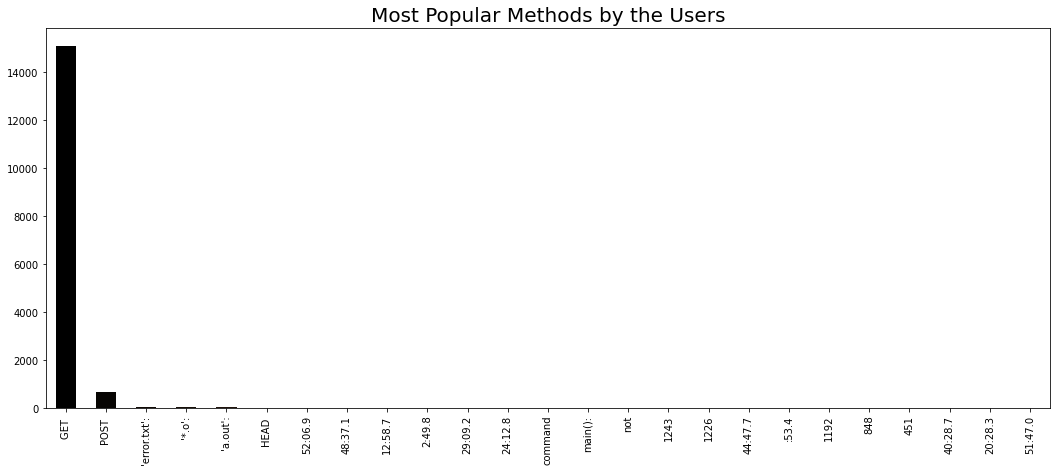

In [ ]:
plt.rcParams['figure.figsize'] = (18, 7)

color = plt.cm.copper(np.linspace(0, 1, 40))
data['Methods'].value_counts().head(40).plot.bar(color = color)
plt.title('Most Popular Methods by the Users', fontsize = 20)

Text(0.5, 1.0, 'Most Popular URLs by the Users')

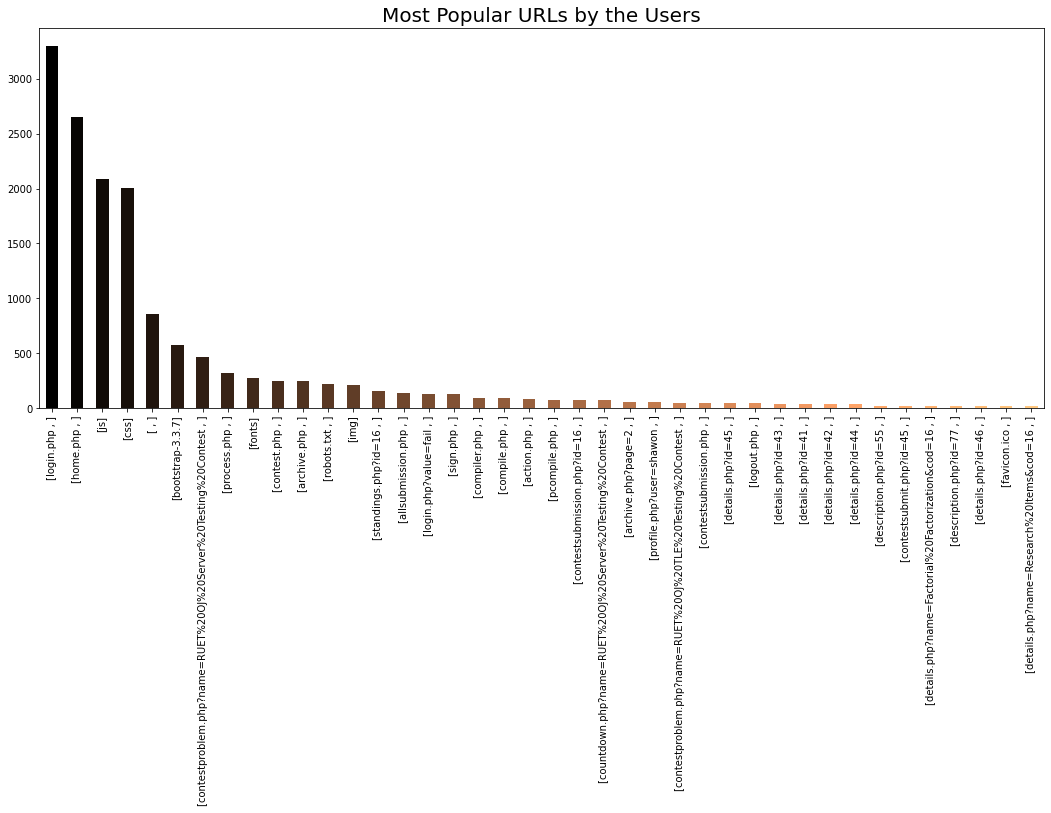

In [ ]:
plt.rcParams['figure.figsize'] = (18, 7)

color = plt.cm.copper(np.linspace(0, 1, 40))
data['URL_new'].value_counts().head(40).plot.bar(color = color)
plt.title('Most Popular URLs by the Users', fontsize = 20)

Text(0.5, 1.0, 'Most Popular Months of Logins')

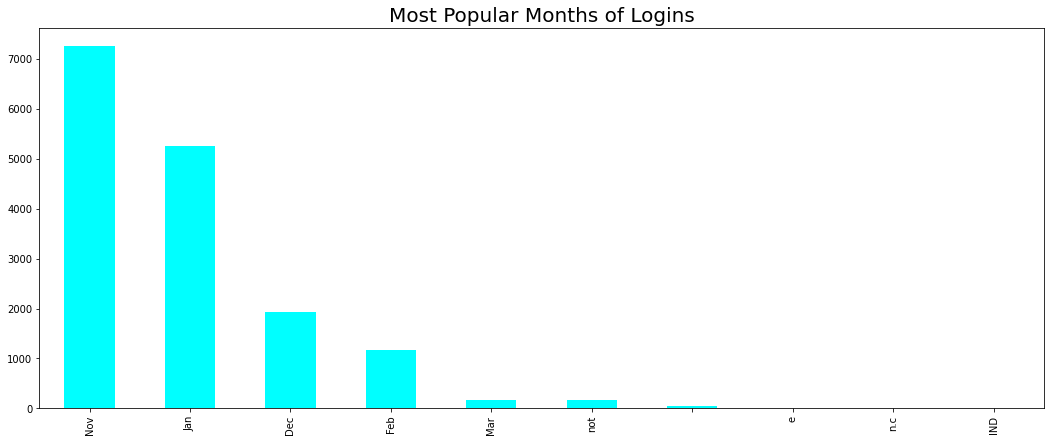

In [ ]:
plt.rcParams['figure.figsize'] = (18, 7)

color = plt.cm.copper(np.linspace(0, 1, 40))
data['month'].value_counts().head(40).plot.bar(color = 'cyan')
plt.title('Most Popular Months of Logins', fontsize = 20)

Text(0.5, 1.0, 'Most Popular Days of Logins')

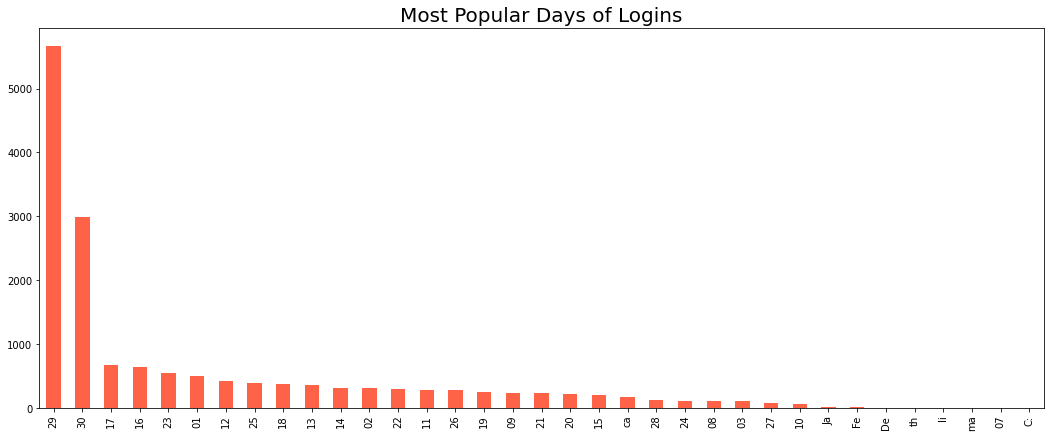

In [ ]:
plt.rcParams['figure.figsize'] = (18, 7)

color = plt.cm.copper(np.linspace(0, 1, 40))
data['day'].value_counts().head(40).plot.bar(color = 'tomato')
plt.title('Most Popular Days of Logins', fontsize = 20)

Text(0.5, 1.0, 'Most Popular statuses for the Users')

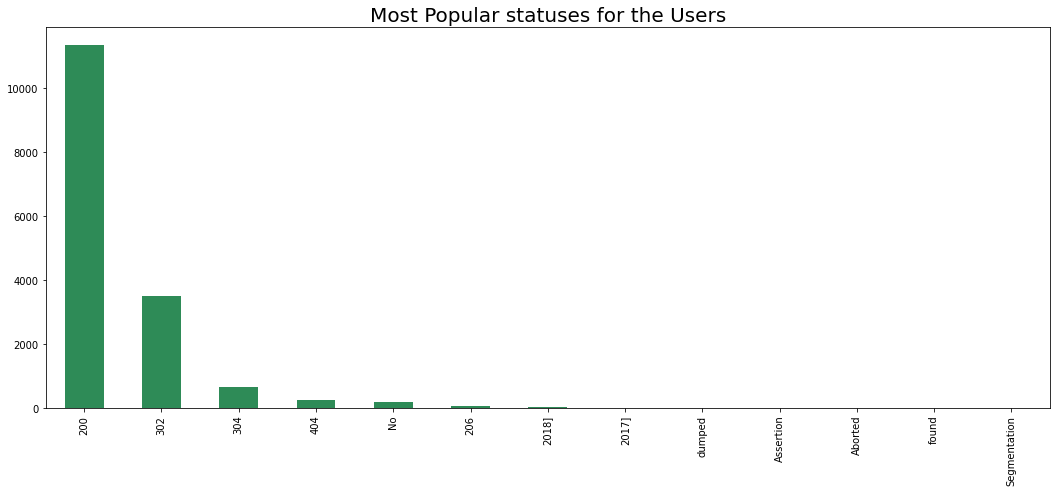

In [ ]:
plt.rcParams['figure.figsize'] = (18, 7)

color = plt.cm.Wistia(np.linspace(0, 1, 40))
data['Status'].value_counts().head(40).plot.bar(color = 'seagreen')
plt.title('Most Popular statuses for the Users', fontsize = 20)